# <font color='red'> Spoken Digit Recognition</font>


In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>Instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. Please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>



In [1]:
import numpy as np
import pandas as pd
import librosa
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
##if you need any imports you can do that here. 

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


We shared recordings.zip, please unzip those. 

In [3]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
r = "drive/My Drive/content/recordings/"
all_files=[]
for a in os.listdir(r):
    all_files.append(os.path.join(r,a))
print("No. of audio files:",len(all_files))

No. of audio files: 2000


<font size=4>Grader function 1 </font>

In [4]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

## Exploring the sound dataset

In [5]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

In [6]:
import IPython
IPython.display.Audio(all_files[0])

## Creating dataframe

In [7]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
df_audio = pd.DataFrame({"path":all_files,"label":[b[len(r)] for b in all_files]})
df_audio.head()

,path,label
0,drive/My Drive/content/recordings/5_jackson_0.wav,5
1,drive/My Drive/content/recordings/5_jackson_1.wav,5
2,drive/My Drive/content/recordings/5_jackson_10...,5
3,drive/My Drive/content/recordings/5_jackson_11...,5
4,drive/My Drive/content/recordings/5_jackson_12...,5


In [8]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [9]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [10]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [11]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_audio["path"],df_audio["label"],test_size=0.3,stratify=df_audio["label"],
                                                   random_state=45)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1400,), (600,), (1400,), (600,))

<font size=4>Grader function 3 </font>

In [13]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [14]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [15]:
z = load_wav(all_files[0])
z

[array([-0.01647412, -0.02081497, -0.01905589, ..., -0.00874536,
        -0.00633125,  0.        ], dtype=float32), 0.42426303854875286]

In [16]:
len(z[0]),0.42426303854875286*22050

(9355, 9355.0)

In [17]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
xtr_p = [load_wav(x)[0] for x in X_train]
xte_p = [load_wav(x)[0] for x in X_test]
xtr_d = [load_wav(x)[1] for x in X_train]
xte_d = [load_wav(x)[1] for x in X_test]

len(xtr_p),len(xte_p),len(xtr_d),len(xte_d)

(1400, 600, 1400, 600)

In [18]:
X_train_processed = pd.DataFrame({"raw_data":xtr_p,"duration":xtr_d})
X_test_processed = pd.DataFrame({"raw_data":xte_p,"duration":xte_d})

In [19]:
X_train_processed.head()

,raw_data,duration
0,"[-0.0002015104, -8.0844686e-05, -3.0828054e-05...",0.222630
1,"[-0.0004445809, -0.00057286676, -0.00061524694...",0.352653
2,"[-0.0008351869, -0.00088791404, -0.00056625315...",0.396644
3,"[-0.01165101, -0.015677933, -0.01861837, -0.02...",0.359501
4,"[0.009092156, 0.010865747, 0.011127, 0.0105336...",0.664762


In [20]:
X_test_processed.head()

,raw_data,duration
0,"[0.00012860933, 0.00022954274, 0.00024249818, ...",0.239909
1,"[-0.010588735, -0.009987316, -0.00675926, -0.0...",0.371791
2,"[-0.00036598003, -0.00020610698, 4.5755176e-05...",0.306893
3,"[-0.00018873895, -0.00021362105, -0.0001426177...",0.161769
4,"[-0.00984854, -0.013759347, -0.014475624, -0.0...",0.422902


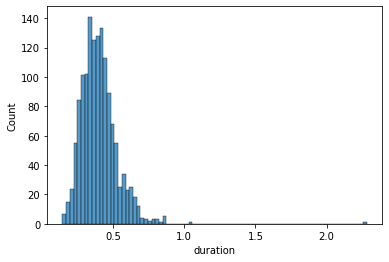

In [21]:
#plot the histogram of the duration for trian
sns.histplot(X_train_processed["duration"])

In [22]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(0,101,10):
    print('{}th percentile of duration is '.format(i),np.percentile(X_train_processed["duration"],i))

0th percentile of duration is  0.1435374149659864
10th percentile of duration is  0.26225396825396824
20th percentile of duration is  0.298140589569161
30th percentile of duration is  0.33127437641723356
40th percentile of duration is  0.3572517006802721
50th percentile of duration is  0.388843537414966
60th percentile of duration is  0.4164172335600907
70th percentile of duration is  0.4444671201814059
80th percentile of duration is  0.48358276643990933
90th percentile of duration is  0.5549297052154195
100th percentile of duration is  2.282766439909297


In [23]:
##print 90 to 100 percentile values with step size of 1. 
for i in range(90,101,1):
    print('{}th percentile of duration is '.format(i),np.percentile(X_train_processed["duration"],i))

90th percentile of duration is  0.5549297052154195
91th percentile of duration is  0.5669832199546486
92th percentile of duration is  0.5790349206349207
93th percentile of duration is  0.5902512471655333
94th percentile of duration is  0.6078993197278911
95th percentile of duration is  0.6210544217687075
96th percentile of duration is  0.6362902494331066
97th percentile of duration is  0.6574408163265306
98th percentile of duration is  0.681934693877551
99th percentile of duration is  0.7654394557823128
100th percentile of duration is  2.282766439909297


<font size=4>Grader function 4 </font>

In [24]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [25]:
max_length  = 17640

In [26]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

def mask_pad(data):
    from tqdm import tqdm
    pad_sequence = np.zeros((len(data),max_length))
    mask = np.zeros((len(data),max_length))
    for n,val in tqdm(enumerate((data.values))):
        if len(val)<max_length:
            #pad
            pad_sequence[n] = np.append(val,[0]*(max_length-len(val)))
            mask[n] = np.where(pad_sequence[n]==0,0,1)
        else:
            #truncate 
            pad_sequence[n] = pad_sequence[n][0:max_length]
            mask[n] = np.where(pad_sequence[n]==0,0,1)
    return pad_sequence,mask.astype(bool)

In [27]:
X_train_pad_seq,X_train_mask = mask_pad(X_train_processed["raw_data"])
X_test_pad_seq,X_test_mask = mask_pad(X_test_processed["raw_data"])

1400it [00:01, 1120.01it/s]
600it [00:00, 1279.03it/s]


In [28]:
X_train_pad_seq.shape,X_train_mask.shape,X_test_pad_seq.shape,X_test_mask.shape

((1400, 17640), (1400, 17640), (600, 17640), (600, 17640))

In [29]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [30]:
y_train.shape,y_test.shape

((1400,), (600,))

<font size=4>Grader function 5 </font>

In [31]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [32]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model,Sequential
import tensorflow as tf

In [33]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool

tf.keras.backend.clear_session()
seq_input_layer = Input(shape=(max_length,1), dtype='float32',name='seq_inp')
mask_input_layer = Input(shape=(max_length), dtype='bool',name='mask_inp')
lstm1 = LSTM(64)(seq_input_layer,mask=mask_input_layer)
fc1 = Dense(64,activation='relu',kernel_initializer='he_uniform')(lstm1)
dp1 = Dropout(0.2)(fc1)
output_layer = Dense(10,activation='softmax')(dp1)

model_1 = Model(inputs=[seq_input_layer,mask_input_layer],outputs=output_layer)

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq_inp (InputLayer)           [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_inp (InputLayer)          [(None, 17640)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           16896       ['seq_inp[0][0]',                
                                                                  'mask_inp[0][0]']               
                                                                                                  
 dense (Dense)                  (None, 64)           4160        ['lstm[0][0]']               

In [34]:
from sklearn.metrics import f1_score
def f1s(y_true,y_pred):
  y = np.argmax(y_pred,axis=1)
  score=f1_score(y_true,y,average='micro')
  return score
def micro_f1s(y_true,y_pred):
    return tf.py_function(f1s,(y_true,y_pred),tf.double)

import datetime
from tensorflow.keras.callbacks import ModelCheckpoint


log_dir = "log1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

optimizer = tf.keras.optimizers.Adam()
              
#model compilation
model_1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy',micro_f1s])
              
#training the model
a=model_1.fit([X_train_pad_seq,X_train_mask],y_train,epochs=2,callbacks=[tensorboard_callback],validation_data=([X_test_pad_seq,X_test_mask],y_test))

Epoch 1/2
44/44 [==============================] - 695s 16s/step - loss: 2.3044 - accuracy: 0.0979 - micro_f1s: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_micro_f1s: 0.0998
Epoch 2/2
44/44 [==============================] - 717s 16s/step - loss: 2.3034 - accuracy: 0.1021 - micro_f1s: 0.1018 - val_loss: 2.3026 - val_accuracy: 0.1017 - val_micro_f1s: 0.1020


### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [35]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [36]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram = np.array([convert_to_spectrogram(x) for x in X_train_pad_seq])
X_test_spectrogram = np.array([convert_to_spectrogram(x) for x in X_test_pad_seq])

In [37]:
X_train_spectrogram.shape,X_test_spectrogram.shape

((1400, 64, 35), (600, 64, 35))

<font size=4>Grader function 6 </font>

In [38]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True


Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [39]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, TimeDistributed,GlobalAveragePooling2D,GlobalAveragePooling1D
from tensorflow.keras.models import Model,Sequential
import tensorflow as tf

In [40]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above

tf.keras.backend.clear_session()
seq_input_layer = Input(shape=(64,35), dtype='float32',name='seq_inp')
#mask_inp_layer = Input(shape=(max_length), dtype='bool',name='mask_inp')
lstm = LSTM(64,input_shape=(64,35),return_sequences=True)(seq_input_layer)
gap = GlobalAveragePooling1D()(lstm)
fc1 = Dense(64,activation='relu',kernel_initializer='he_uniform')(gap)
dp1 = Dropout(0.2)(fc1)
output_layer = Dense(10,activation='softmax')(dp1)

model_2 = Model(inputs=seq_input_layer,outputs=output_layer)

model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 seq_inp (InputLayer)        [(None, 64, 35)]          0         
                                                                 
 lstm (LSTM)                 (None, 64, 64)            25600     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                             

In [41]:
#compile and fit your model.
#model2.fit([X_train_spectrogram],y_train_int,......)

from sklearn.metrics import f1_score, make_scorer
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

def f1s(y_true,y_pred):
  y = np.argmax(y_pred,axis=1)
  score=f1_score(y_true,y,average='micro')
  return score

#auc metric
def micro_f1s(y_true,y_pred):
    return tf.py_function(f1s,(y_true,y_pred),tf.double)

#tensorboard
log_dir = "log1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#optimizer defining 
optimizer = tf.keras.optimizers.Adam()
              
#model compilation
model_2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy',micro_f1s])
              
#training the model
model_2.fit(X_train_spectrogram,y_train,epochs=100,callbacks=[tensorboard_callback],validation_data=(X_test_spectrogram,y_test))

Epoch 1/100
44/44 [==============================] - 5s 67ms/step - loss: 2.3423 - accuracy: 0.1214 - micro_f1s: 0.1210 - val_loss: 2.2005 - val_accuracy: 0.2117 - val_micro_f1s: 0.2122
Epoch 2/100
44/44 [==============================] - 2s 47ms/step - loss: 2.1804 - accuracy: 0.1886 - micro_f1s: 0.1887 - val_loss: 2.0946 - val_accuracy: 0.2450 - val_micro_f1s: 0.2445
Epoch 3/100
44/44 [==============================] - 3s 66ms/step - loss: 2.0662 - accuracy: 0.2629 - micro_f1s: 0.2630 - val_loss: 1.9795 - val_accuracy: 0.3183 - val_micro_f1s: 0.3180
Epoch 4/100
44/44 [==============================] - 3s 70ms/step - loss: 1.9543 - accuracy: 0.3086 - micro_f1s: 0.3080 - val_loss: 1.8819 - val_accuracy: 0.3367 - val_micro_f1s: 0.3372
Epoch 5/100
44/44 [==============================] - 2s 44ms/step - loss: 1.8769 - accuracy: 0.3336 - micro_f1s: 0.3336 - val_loss: 1.7568 - val_accuracy: 0.3833 - val_micro_f1s: 0.3843
Epoch 6/100
44/44 [==============================] - 2s 44ms/step - lo

### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [42]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [43]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [44]:
len(aug_temp)

9

## Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],random_state=45,test_size=0.2,stratify=df_audio['label'])

3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

<font color='red'> Note </font> - While fitting your model on the augmented data for model 3 you might face Resource exhaust error. One simple hack to avoid that is save the augmented_train_data,augment_y_train,test_data and y_test to Drive or into your local system. Then restart the runtime so that now you can train your model with full RAM capacity. Upload these files again in the new runtime session perform padding and masking and then fit your model.

In [46]:
aug1 = []
y_aug1 = []
for x,y in zip(X_train,y_train):
  aug1.extend(generate_augmented_data(x))
  y_aug1.extend([y]*9)
np.array(aug1).shape,np.array(y_aug1).shape

((14400,), (14400,))

In [47]:
aug_train = np.array(aug1)
ytr_aug = np.array(y_aug1)

In [48]:
ytr_aug = ytr_aug.astype('int')
y_test = y_test.astype('int')

In [49]:
xte_pp = [load_wav(x)[0] for x in X_test]

In [50]:
max_length = 17640

def mask_pading(data):
    from tqdm import tqdm
    pad_sequence = np.zeros((len(data),max_length))
    mask = np.zeros((len(data),max_length))
    for n,val in tqdm(enumerate((data))):
        if len(val)<max_length:
            #pad
            pad_sequence[n] = np.append(val,[0]*(max_length-len(val)))
            mask[n] = np.where(pad_sequence[n]==0,0,1)
        else:
            #truncate 
            pad_sequence[n] = pad_sequence[n][0:max_length]
            mask[n] = np.where(pad_sequence[n]==0,0,1)
    return pad_sequence,mask.astype(bool)

In [51]:
X_train_pad_seq,X_train_mask = mask_pading(aug_train)
X_test_pad_seq,X_test_mask = mask_pading(xte_pp)
X_train_pad_seq.shape,X_test_pad_seq.shape,X_train_mask.shape,X_test_mask.shape

14400it [00:15, 958.44it/s] 
400it [00:00, 1171.85it/s]


((14400, 17640), (400, 17640), (14400, 17640), (400, 17640))

In [52]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model,Sequential
import tensorflow as tf

tf.keras.backend.clear_session()
seq_input_layer = Input(shape=(max_length,1), dtype='float32',name='seq_inp')
mask_input_layer = Input(shape=(max_length), dtype='bool',name='mask_inp')
lstm = LSTM(64)(seq_input_layer,mask=mask_input_layer)
fc1 = Dense(64,activation='relu',kernel_initializer='he_uniform')(lstm)
dp1 = Dropout(0.2)(fc1)
output_layer = Dense(10,activation='softmax')(dp1)

model_3 = Model(inputs=[seq_input_layer,mask_input_layer],outputs=output_layer)

model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq_inp (InputLayer)           [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_inp (InputLayer)          [(None, 17640)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           16896       ['seq_inp[0][0]',                
                                                                  'mask_inp[0][0]']               
                                                                                                  
 dense (Dense)                  (None, 64)           4160        ['lstm[0][0]']               

In [53]:
def f1s(y_true,y_pred):
  y = np.argmax(y_pred,axis=1)
  score=f1_score(y_true,y,average='micro')
  return score

from sklearn.metrics import f1_score, make_scorer
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

#auc metric
def micro_f1s(y_true,y_pred):
    return tf.py_function(f1s,(y_true,y_pred),tf.double)

#tensorboard
log_dir = "log1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#optimizer defining 
optimizer = tf.keras.optimizers.Adam()
              
#model compilation
model_3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy',micro_f1s])
              
#training the model
model_3.fit([X_train_pad_seq,X_train_mask],ytr_aug,epochs=2,callbacks=[tensorboard_callback],validation_data=([X_test_pad_seq,X_test_mask],y_test))

Epoch 1/2
450/450 [==============================] - 5633s 13s/step - loss: 2.3030 - accuracy: 0.0975 - micro_f1s: 0.0975 - val_loss: 2.3023 - val_accuracy: 0.1050 - val_micro_f1s: 0.1010
Epoch 2/2
450/450 [==============================] - 5636s 13s/step - loss: 2.3011 - accuracy: 0.1065 - micro_f1s: 0.1065 - val_loss: 2.3022 - val_accuracy: 0.1050 - val_micro_f1s: 0.1034


### 4. Data augmentation with spectogram data

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [54]:
import numpy as np
X_train_spectrogram = np.array([convert_to_spectrogram(x) for x in X_train_pad_seq])
X_test_spectrogram = np.array([convert_to_spectrogram(x) for x in X_test_pad_seq])


In [55]:
X_train_spectrogram.shape,X_test_spectrogram.shape

((14400, 64, 35), (400, 64, 35))

In [56]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, TimeDistributed,GlobalAveragePooling2D,GlobalAveragePooling1D
from tensorflow.keras.models import Model,Sequential
import tensorflow as tf

tf.keras.backend.clear_session()
seq_input_layer = Input(shape=(64,35), dtype='float32',name='seq_inp')
#mask_inp_layer = Input(shape=(max_length), dtype='bool',name='mask_inp')
lstm = LSTM(64,input_shape=(64,35),return_sequences=True)(seq_input_layer)
gap = GlobalAveragePooling1D()(lstm)
fc1 = Dense(64,activation='relu',kernel_initializer='he_uniform')(gap)
dp1 = Dropout(0.2)(fc1)
output_layer = Dense(10,activation='softmax')(dp1)

model_4 = Model(inputs=seq_input_layer,outputs=output_layer)

model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 seq_inp (InputLayer)        [(None, 64, 35)]          0         
                                                                 
 lstm (LSTM)                 (None, 64, 64)            25600     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                             

In [57]:
from sklearn.metrics import f1_score, make_scorer
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

def f1s(y_true,y_pred):
  y = np.argmax(y_pred,axis=1)
  score=f1_score(y_true,y,average='micro')
  return score

#auc metric
def micro_f1s(y_true,y_pred):
    return tf.py_function(f1s,(y_true,y_pred),tf.double)

#tensorboard
log_dir = "log1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#optimizer defining 
optimizer = tf.keras.optimizers.Adam()
              
#model compilation
model_4.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy',micro_f1s])
              
#training the model
model_4.fit(X_train_spectrogram,ytr_aug,epochs=150,callbacks=[tensorboard_callback],validation_data=(X_test_spectrogram,y_test))

Epoch 1/150
450/450 [==============================] - 18s 35ms/step - loss: 2.0643 - accuracy: 0.2348 - micro_f1s: 0.2348 - val_loss: 1.6960 - val_accuracy: 0.4475 - val_micro_f1s: 0.4375
Epoch 2/150
450/450 [==============================] - 17s 39ms/step - loss: 1.6958 - accuracy: 0.3881 - micro_f1s: 0.3881 - val_loss: 1.4344 - val_accuracy: 0.5150 - val_micro_f1s: 0.5192
Epoch 3/150
450/450 [==============================] - 16s 35ms/step - loss: 1.4967 - accuracy: 0.4680 - micro_f1s: 0.4680 - val_loss: 1.3229 - val_accuracy: 0.5575 - val_micro_f1s: 0.5577
Epoch 4/150
450/450 [==============================] - 16s 35ms/step - loss: 1.3743 - accuracy: 0.5139 - micro_f1s: 0.5139 - val_loss: 1.0891 - val_accuracy: 0.6175 - val_micro_f1s: 0.6178
Epoch 5/150
450/450 [==============================] - 15s 34ms/step - loss: 1.2885 - accuracy: 0.5428 - micro_f1s: 0.5428 - val_loss: 1.0600 - val_accuracy: 0.6275 - val_micro_f1s: 0.6274
Epoch 6/150
450/450 [==============================] - 